In [17]:
import numpy as np
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
scaler = StandardScaler()

m = 100
X_original = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X = scaler.fit_transform(X_original, y)

# Closed-Form Solution

In [22]:
# The solver is a more optimized way of calculating the closed-form solution
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[2.71762681]])

# Stochastic Gradient Descent

In [23]:
# Penalty adds a regularization term equal to the square of l2 norm of the weight vector 
# This is simply ridge regression
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([2.68311345])

### The prediction is poor because we're trying to use a linear model to predict a more complex function

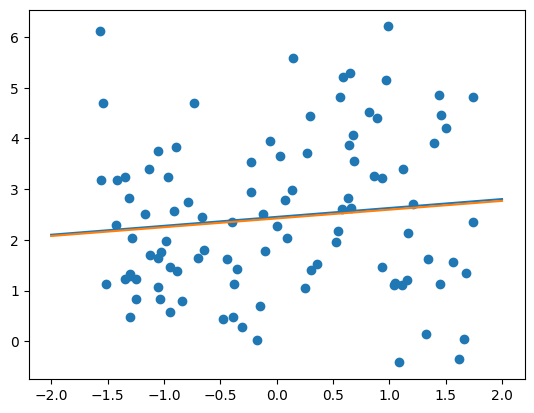

In [32]:
X_new = np.c_[np.linspace(-2, 2, 1000)]
y_ridge = ridge_reg.predict(X_new)
y_sgd = sgd_reg.predict(X_new)

plt.plot(X_new, y_ridge)
plt.plot(X_new, y_sgd)
plt.scatter(X, y)
plt.show()